In [3]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
class_df = pd.read_csv("CSCI_Fall_2024_survey.csv") # Read the file

# Making sure I know what the data looks like
class_df.head(26)

,Timestamp,What is your name?,What are your pronouns?,What state/country were you born in?,How many siblings do you have?,How much experience do you have programming?,What class are you in?,Are you working while in school?,How many pets and of which kind do you have?,What is your favorite type of food?,Where do you live?,Do you take the metro?,What is your major?,How old are you?,What is your favorite TV show?,What is your favorite video game?,What is your favorite book?,Why are you taking this class?,Whats your favorite bash command?
0,2024/09/05 6:10:09 PM EST,Alex,He/Him,Mexico,1,1-2 years,Freshman,No,"1, Dog",Japanese,Off campus,No,Computer Science,18,Friends,Persona Series,Anything about mythology,My major,cd and ls
1,2024/09/05 6:33:51 PM EST,Tanay,He/Him,Missouri,1,0-3 months,Freshman,No,0,Mexican,On campus,No,CS/Business,18,Suits,Super Smash bros,Percy Jackson,To get a deeper understanding and basics of cs,ls
2,2024/09/05 6:34:21 PM EST,Akshita,She/Her,"Frankfurt, Germany",1,0-3 months,Freshman,No,no pets!,Italian,On campus,No,Data Science,18,How I Met Your Mother,Mario Kart,Harry Potter,To learn programming for my major!,git commit
3,2024/09/05 6:35:03 PM EST,Anthony,He/Him,Wisconsin,1,0-3 months,Senior,Yes,I have two dogs and they are both at home,Italian,Off campus,No,Business Economics,21,Breaking Bad,Call of Duty,NaN,Programming has always been an interest of mine,ls
4,2024/09/05 6:35:56 PM EST,Nuri,He/Him,"st. louis, mo",2,1-2 years,Freshman,No,0,American,On campus,No,computer science,18,Hunter x Hunter,valorant,berserk,interested in having a career in data,ls
5,2024/09/05 6:35:57 PM EST,Mahley,She/Her,Missouri,1,0-3 months,Freshman,No,0,Japanese,On campus,No,Computer Science,18,The Office,until dawn,I don't read books,to become a software engineer,print
6,2024/09/05 6:36:02 PM EST,Chetan,He/Him,India,1,0-3 months,Freshman,No,none,Indian,On campus,No,cs/ finance,18,all of us are dead,minecraft,harry potter,its for my major,i dont know what that is
7,2024/09/05 6:36:13 PM EST,Steven,He/Him,St. Louis MO,1,6 months - 1 year,Freshman,Yes,NaN,Mexican,Off campus,No,Computer Science,18,X-Men 97,Devil Survivor 2 Overclocked,Series of Unfortunate Events - Reptile Room,To learn the basics of Coding since I only rea...,ls
8,2024/09/05 6:36:14 PM EST,Nico,multiple: he/him and they/them,"Missouri, USA",2,0-3 months,Freshman,Yes,1 dog and 1 cat,Chinese,On campus,Yes,Computer Science; considering an additional ma...,18,It's Always Sunny In Philadelphia,Pikmin,Percy Jackson,It's required for my major + I know nothing ab...,cd
9,2024/09/05 6:36:24 PM EST,Iovane,He/Him,Georgia (the country not the state),4,0-3 months,Freshman,Yes,"2 cats, one dog",Mexican,Off campus,No,Data Science,19,GOT,Minecraft,1984,Major Requirement,cd


In [20]:
# Give all necessary columns an alias to make them easier to work with (don't need to do some of them, such as the timestamp
# or number of siblings because they're either unimportant or already standardized to our liking). Not necessary, of course, but it is nice :)

names = class_df["What is your name?"]

pronouns = class_df["What are your pronouns?"]

bPlaces = class_df["What state/country were you born in?"]

pets = class_df["How many pets and of which kind do you have?"]

foods = class_df["What is your favorite type of food?"]

majors = class_df["What is your major?"]

ages = class_df["How old are you?"] # At first glance, this seems standardized, but I'll keep this here as the directions imply an issue.


In [120]:
# I'm going to define functions by column, because if I try and define them by data type, I'll run into issues across columns; comparing 
# name to pronouns, for instance.

# Lowercase all names to ensure ASCII consistency (A character string beginning with uppercase will be "weighted" drastically differently
# than one that begins with a lowercase character).
def std_name(col):
        col = np.where(col.str.islower() == True, col, col.str.lower()) # The first link provided (geeksforgeeks.org) helped me understand
    # how where() evaluates its parameters; our in-class example was a bit lengthy, but I did understand how hierarchy works in where().
    # In this specific instance, where() first checks if the value in question is (all) lowercase-- if it isn't, then it executes the first
    # operation. If it is indeed all lowercase, nothing happens (represented by us leaving the column as is).
        return col

# Testing
class_df["What is your name?"] = std_name(names) # Assign the new column back to the original dataframe

class_df["What is your name?"].head()

# I realize the above is not required, but I wanted to make sure I was appropriately using where() and understanding its application.

0       alex
1      tanay
2    akshita
3    anthony
4       nuri
Name: What is your name?, dtype: object

In [139]:
# I am going to standardize birth places by removing all whitespace and making them lowercase; more advanced standardization likely requires 
# sophisticated algorithms I'm uncomfortable writing as of now.
def std_bPlaces(col):
    col = np.where(col.str.islower(), col, col.str.lower()) # Reused from the std_name() function defined above.
    col = np.char.replace(col.astype(str), " ", "") # This line of code took me a bit of research to troubleshoot. I learned that np.where()
    # converts the column into a NumPy array innately (which makes sense, where() is a NumPy function); however, this causes issues when 
    # attempting to use functions that require Pandas series as operands, so I needed to find a NumPy alternative, which would be 
    # char.replace(). I need astype() here since my first iterations threw an error that said that col was an array of objects, which I 
    # needed to convert to strings.
    
    return col

# Testing
class_df["What state/country were you born in?"] = std_bPlaces(bPlaces) # Assign the new column back to the original dataframe

class_df["What state/country were you born in?"].head()

0               mexico
1             missouri
2    frankfurt,germany
3            wisconsin
4          st.louis,mo
Name: What state/country were you born in?, dtype: object

In [171]:
# I am hoping to standardize pets by ensuring that there is no leading or trailing whitespace. It's simple, but the variety of answers makes
# consistency somewhat difficult.
# One observation: some data that is numerical ("0", "1") is classified as a string along with some very clearly linguistic answers; 
# I am glad this is the case in Google Forms, as it helps make the usage of such functions easier.
def std_pets(col):
    col.str.strip()
    return col

# Testing
class_df["How many pets and of which kind do you have?"] = std_pets(pets) # Assign the new column back to the original dataframe

class_df["How many pets and of which kind do you have?"].head()

0                                       1, Dog
1                                            0
2                                     no pets!
3    I have two dogs and they are both at home
4                                            0
Name: How many pets and of which kind do you have?, dtype: object

In [194]:
# Since one of the answers is "all of the above" with spaces and another is not in title case, I am hoping to rectify this by removing all 
# whitespace and making sure the first letter is always capitalized.

def std_food(col):
    col = col.str.capitalize() # This is a very cool function-- I first was attempting to write a capitalize() function myself; however, I 
    #ran into errors when trying to use it. Looking it up, I came to find that it is an existing function, and I was able to use it e
    col = col.str.replace(" ", "")
    
    return col

# Testing
class_df["What is your favorite type of food?"] = std_food(foods) # Assign the new column back to the original dataframe

class_df["What is your favorite type of food?"].head(20)

0          Japanese
1           Mexican
2           Italian
3           Italian
4          American
5          Japanese
6            Indian
7           Mexican
8           Chinese
9           Mexican
10         American
11          Italian
12           Indian
13          Italian
14          Mexican
15           Indian
16         Japanese
17          Italian
18    Alloftheabove
19         American
Name: What is your favorite type of food?, dtype: object

In [203]:
# I want to standardize majors by putting them in title case; in this way, we can ensure that "Computer Science" and "Computer science", for
# instance, are evaluated equally. Of course, I also want to remove all trailing and leading whitespace to make this true.

def std_major(col):
    col = col.str.strip()
    col = col.str.title() # Like capitalize() above, I'm glad title() exists, as writing a function to check for whitespace after performing
    # strip() would prove quite menial.

    return col

# Testing
class_df["What is your major?"] = std_major(majors) # Assign the new column back to the original dataframe

class_df["What is your major?"].head()

0      Computer Science
1           Cs/Business
2          Data Science
3    Business Economics
4      Computer Science
Name: What is your major?, dtype: object

In [217]:
# At first glance, there isn't much that needs to be standardized here; the responses are all numerical values. Therefore, I will still take
# heed to ensure all responses are numerical instead of objects.

def std_age(col):
    col = pd.to_numeric(col) # I convert each answer to an equivalent integer value, here.
    return col

# Testing
class_df["How old are you?"] = std_age(ages) # Assign the new column back to the original dataframe

class_df["How old are you?"].head() # As seen below, the return type is now successfully int64 instead of object.

0    18
1    18
2    18
3    21
4    18
Name: How old are you?, dtype: int64

Text(0.5, 1.0, 'Histogram of Class Ages')

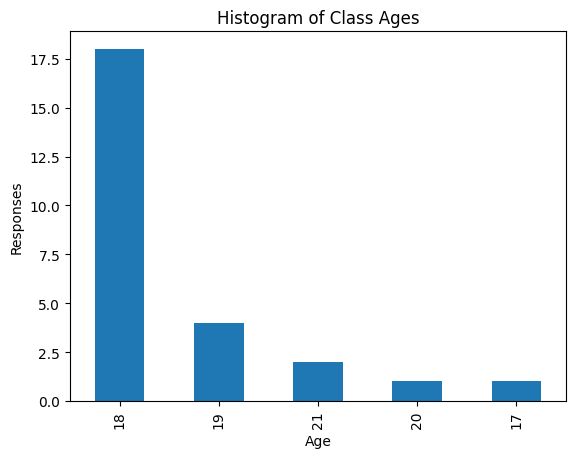

In [8]:
age_hist = class_df["How old are you?"].value_counts()

age_hist.plot(kind = "bar")
plt.xlabel('Age')
plt.ylabel('Responses')
plt.title('Histogram of Class Ages')

# This creates a histogram of our class' ages; each bar represents how many responses chose the respective age highlighted underneath it.
# Clearly, you can see that the majority of the class is 18 years old, with some outliers being two individuals 21 years of age as well as 
# a 17 year old.

<Axes: title={'center': 'Pie Chart of Preferred Pronouns'}, ylabel='Timestamp'>

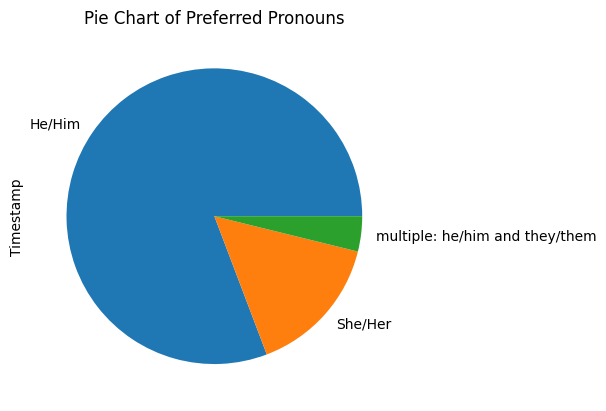

In [73]:
agg_pronouns = class_df.groupby("What are your pronouns?").count()
agg_pronouns.plot(kind = "pie", y = "Timestamp", title = "Pie Chart of Preferred Pronouns", legend = False)

# This creates a pie chart based on the class' preferred pronouns. I think a pie chart works here because the exact value of each
# response doesn't matter as much as the overall class makeup, and a pie chart allows us to visually see ratios and imbalances-- parts of a 
# whole. I had to do some research to find out how I could remove the legend, because its default position was placed in the middle of the
# pie chart, obstructing data. As shown, most of the class prefers he/him pronouns.

Text(0.5, 1.0, 'Scatter Plot of Programming Experience')

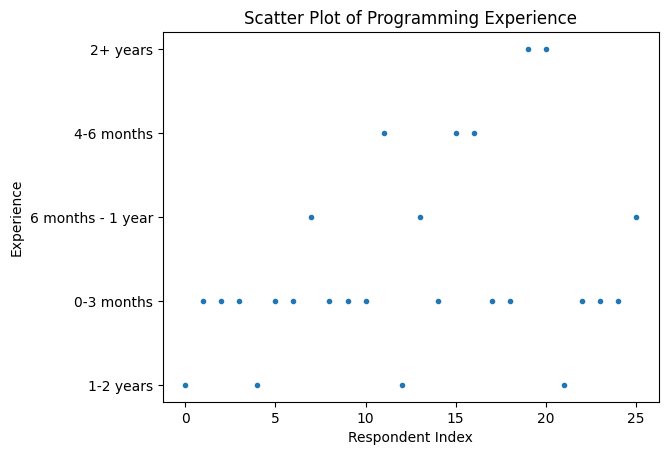

In [61]:
plt.plot(class_df["How much experience do you have programming?"], '.')

plt.xlabel("Respondent Index")
plt.ylabel("Experience")
plt.title("Scatter Plot of Programming Experience")

# This line creates a scatter plot of how much experience the class has coding. I realize that a scatter plot is likely not the best way
# to depict this data as you can see that the experience axis is non-linear, but for variety's sake, I have one, here. The class as a whole 
# seems pretty spread out, but a lot of people seem to have 0-3 months of experience. I would also like to point out that using a scatter
# plot in this way is deceiving; the x-axis would have you believe that, say, 24 responses have said they have 0-3 months of experience, when
# it only means that respondent #24 answered as such.

Text(0.5, 1.0, 'Histogram of Class Siblings')

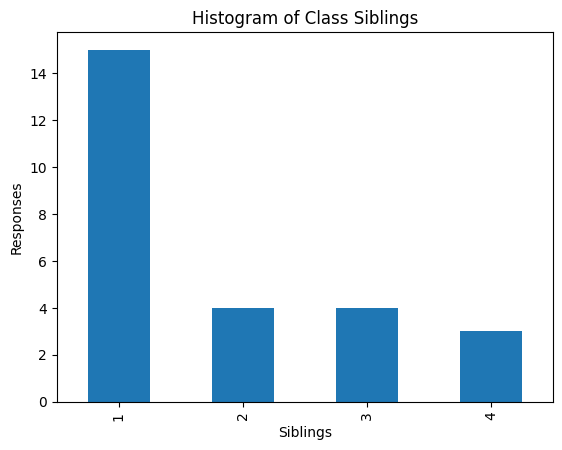

In [64]:
sib_hist = class_df["How many siblings do you have?"].value_counts()

sib_hist.plot(kind = "bar")
plt.xlabel('Siblings')
plt.ylabel('Responses')
plt.title('Histogram of Class Siblings')

# This is a histogram depicting how many siblings the class has. It seems that the majority only has one other sibling; however,
# interestingly, no one responded saying that they have no siblings, at all. I am unsure whether that is an error of the survey not including
# that option, or just a fun fact.

<Axes: title={'center': 'Pie Chart of Residence'}, ylabel='Timestamp'>

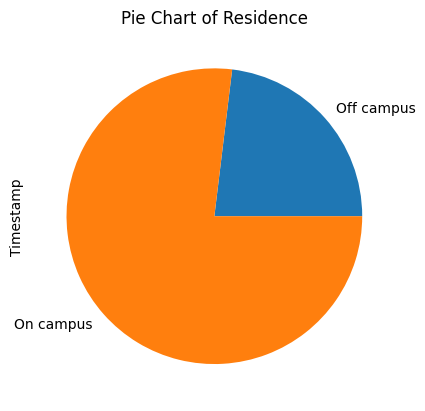

In [77]:
agg_class = class_df.groupby("Where do you live?").count()
agg_class.plot(kind = "pie", y = "Timestamp", title = "Pie Chart of Residence", legend = False)

# This is a pie chart depicting whether most of the class lives on or off campus. It seems that the majority are residents here at SLU, while
# about 25% of the class live off-campus.